**For creating the models I used my previously coded models**

I used ChatGPT only for the creation of the confusion matrix and the last accuracy comparison plot (it is much faster)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report

## Preparing the data

In [2]:
column_names = ['M/F/C', 'SPKR', 'Phoneme_Number', 'Phoneme_Ascii', 'F0', 'F1', 'F2', 'F3']

In [3]:
data = pd.read_csv('./PetersonBarney/verified_pb.data', delim_whitespace=True, header = None, names=column_names)
data

,M/F/C,SPKR,Phoneme_Number,Phoneme_Ascii,F0,F1,F2,F3
0,1,1,1,IY,160.0,240.0,2280.0,2850.0
1,1,1,1,IY,186.0,280.0,2400.0,2790.0
2,1,1,2,IH,203.0,390.0,2030.0,2640.0
3,1,1,2,IH,192.0,310.0,1980.0,2550.0
4,1,1,3,EH,161.0,490.0,1870.0,2420.0
...,...,...,...,...,...,...,...,...
1515,3,76,8,UH,322.0,610.0,1550.0,3400.0
1516,3,76,9,UW,345.0,520.0,1250.0,3460.0
1517,3,76,9,UW,334.0,500.0,1140.0,3380.0
1518,3,76,10,ER,308.0,740.0,1850.0,2160.0


In [4]:
features = ['F0','F1', 'F2', 'F3']
target = 'Phoneme_Number' 
target_names = [str(label) for label in data[target].unique()]
scaler = MinMaxScaler()
data[['F0','F1', 'F2', 'F3']] = scaler.fit_transform(data[['F0', 'F1', 'F2', 'F3']])

In [5]:
train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [6]:
X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]

## With logistic regression

In [7]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [8]:
y_pred = model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy_lr)

Validation Accuracy: 0.7894736842105263


In [9]:
X_test = test_data[features]
y_test = test_data[target]

y_test_pred = model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy_lr)

Test Accuracy: 0.7960526315789473


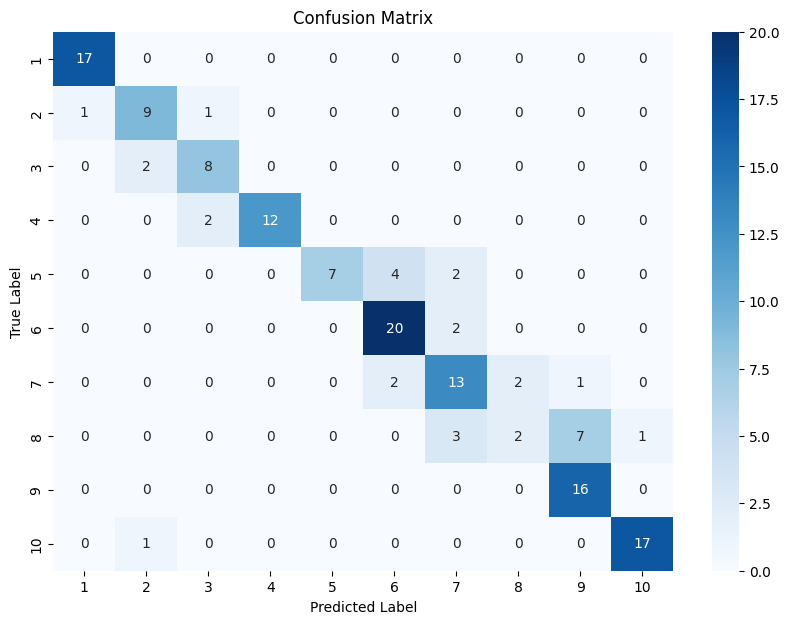

In [10]:
cm = confusion_matrix(y_test, y_test_pred, labels=data[target].unique())
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## With random forest classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9013157894736842


In [13]:
X_test = test_data[features]
y_test = test_data[target]
y_test_pred = model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy_rf)

Test Accuracy: 0.9078947368421053


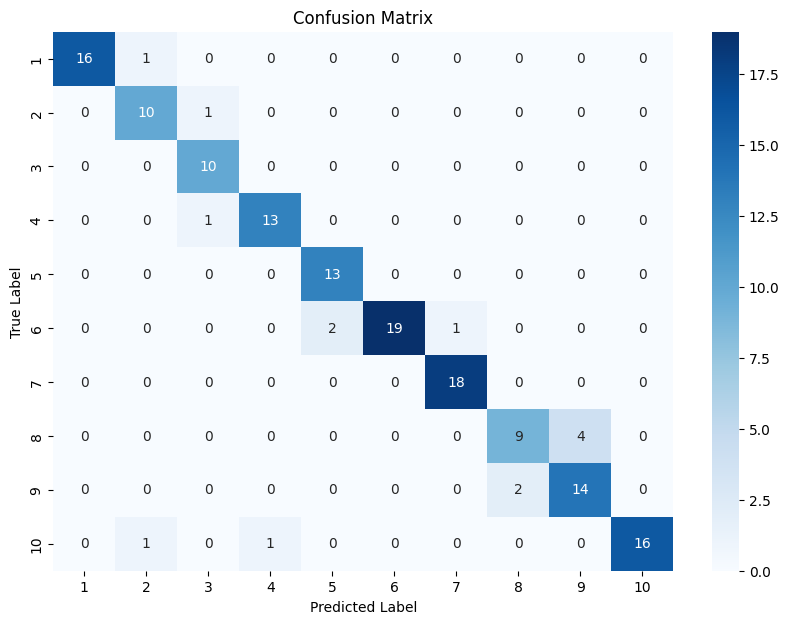

In [14]:
cm = confusion_matrix(y_test, y_test_pred, labels=data[target].unique())
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## GMM

In [15]:
#Redo the loading since GMM indexes the classes from 0-9 (for n=10) so it doesnt much our earlier dataframe (it is not beautiful solution but fast)

column_names = ['M/F/C', 'SPKR', 'Phoneme_Number', 'Phoneme_Ascii', 'F0', 'F1', 'F2', 'F3']
data = pd.read_csv('./PetersonBarney/verified_pb.data', delim_whitespace=True, header=None, names=column_names)

data['Phoneme_Number'] = data['Phoneme_Number'] - 1

features = ['F0', 'F1', 'F2', 'F3']
target = 'Phoneme_Number'
target_names = [str(label) for label in data[target].unique()]

scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

train_data, temp_data = train_test_split(data, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

X_train = train_data[features]
y_train = train_data[target]
X_val = val_data[features]
y_val = val_data[target]


In [16]:
gmm = GaussianMixture(n_components= 10, covariance_type='full', random_state=42)
gmm.fit(X_train)

y_pred_gmm = gmm.predict(X_val)
accuracy_gmm = accuracy_score(y_val, y_pred_gmm)
print("Validation Accuracy GMM:" ,accuracy_gmm)

X_test = test_data[features]
y_test = test_data[target]
y_test_pred_gmm = gmm.predict(X_test)

test_accuracy_gmm = accuracy_score(y_test, y_test_pred_gmm)
print("Test Accuracy GMM:", test_accuracy_gmm)

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\beben\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\beben\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\beben\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1552, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\beben\AppData\Local\Programs\Python\Python311\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>


Validation Accuracy GMM: 0.06578947368421052
Test Accuracy GMM: 0.08552631578947369


C:\Users\beben\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\beben\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


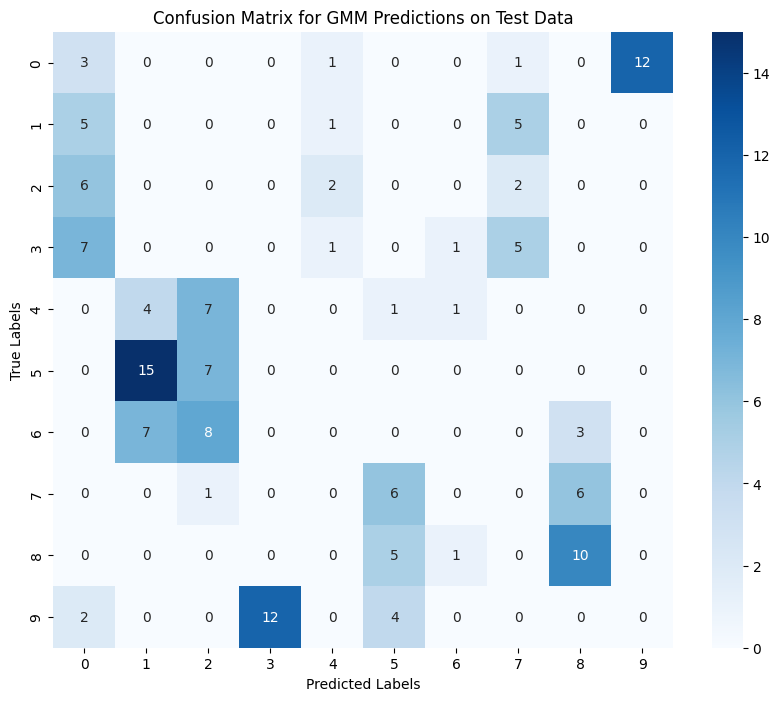

In [17]:
conf_matrix = confusion_matrix(y_test, y_test_pred_gmm)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for GMM Predictions on Test Data')
plt.show()

## Evaluation

* As it can be seen the GMM algorith somehow does a really bad job, both the logistic regression and the random forest classifier reach more than 80% in accuracy
* One cause can be that we do not have enough data so the distribution can not be estimated well
* As we can see in the confusion matrices the first two models give a beautiful confusion matrix with only a few mistakes, while for the GMM model the confusion matrix is pretty bad since there is no sign of any diagonal 

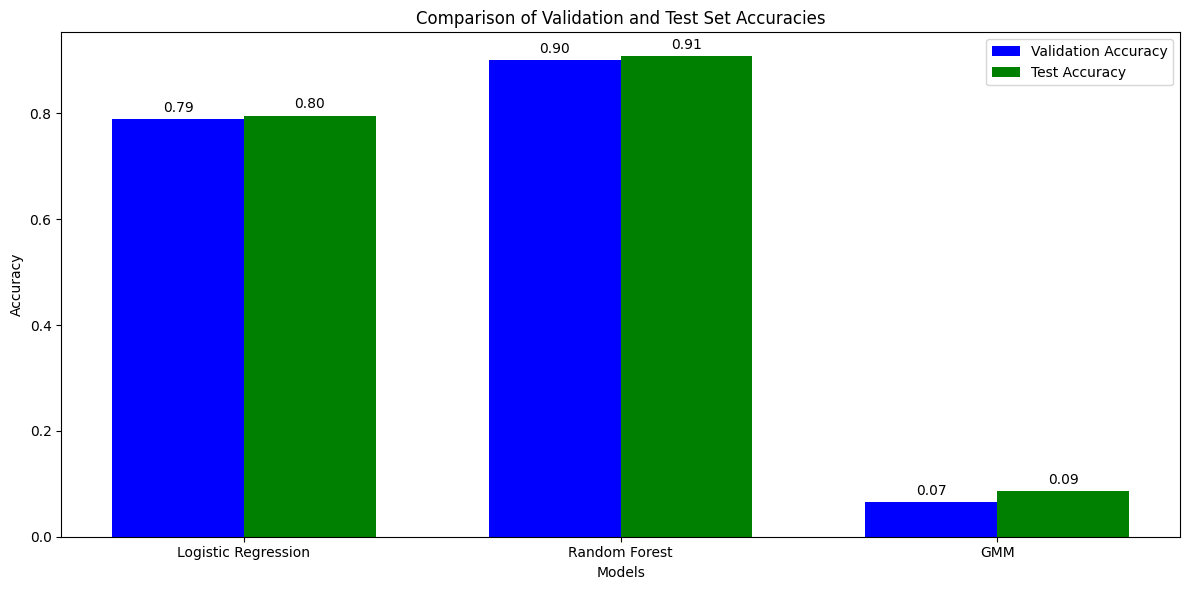

In [18]:
log_reg_val_accuracy = accuracy_lr
log_reg_test_accuracy = test_accuracy_lr

rf_val_accuracy = val_accuracy
rf_test_accuracy = test_accuracy_rf


gmm_val_accuracy = accuracy_gmm
gmm_test_accuracy = test_accuracy_gmm

models = ['Logistic Regression', 'Random Forest', 'GMM']


val_accuracies = [log_reg_val_accuracy, rf_val_accuracy, gmm_val_accuracy]
test_accuracies = [log_reg_test_accuracy, rf_test_accuracy, gmm_test_accuracy]


bar_width = 0.35
index = np.arange(len(models))


fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(index, val_accuracies, bar_width, label='Validation Accuracy', color='b')
bar2 = ax.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy', color='g')


ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Validation and Test Set Accuracies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()